In [153]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
%matplotlib inline

In [154]:
user = pd.read_csv('takehome_users.csv', encoding ='latin1')
usage = pd.read_csv('takehome_user_engagement.csv')

In [155]:
user.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0


In [156]:
user.isnull().sum()

object_id                        0
creation_time                    0
name                             0
email                            0
creation_source                  0
last_session_creation_time    3177
opted_in_to_mailing_list         0
enabled_for_marketing_drip       0
org_id                           0
invited_by_user_id            5583
dtype: int64

In [157]:
user['invited_by_user_id'] = user['invited_by_user_id'].replace(np.NaN,0)

In [158]:
user.isnull().sum()

object_id                        0
creation_time                    0
name                             0
email                            0
creation_source                  0
last_session_creation_time    3177
opted_in_to_mailing_list         0
enabled_for_marketing_drip       0
org_id                           0
invited_by_user_id               0
dtype: int64

In [159]:
usage.head()

,time_stamp,user_id,visited
0,2014-04-22 03:53:30,1,1
1,2013-11-15 03:45:04,2,1
2,2013-11-29 03:45:04,2,1
3,2013-12-09 03:45:04,2,1
4,2013-12-25 03:45:04,2,1


In [160]:
df = usage.groupby(['user_id','time_stamp']).sum()

In [161]:
df.head()

visited
user_id time_stamp                  
1       2014-04-22 03:53:30        1
2       2013-11-15 03:45:04        1
        2013-11-29 03:45:04        1
        2013-12-09 03:45:04        1
        2013-12-25 03:45:04        1

In [162]:
user = user.rename(columns={'object_id':'user_id'})

In [163]:
df_merge = pd.merge(user,usage,how='inner',on='user_id')

In [164]:
df_merge.head()

,user_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,time_stamp,visited
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0,2014-04-22 03:53:30,1
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,2013-11-15 03:45:04,1
2,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,2013-11-29 03:45:04,1
3,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,2013-12-09 03:45:04,1
4,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,2013-12-25 03:45:04,1


In [165]:
df_merge.groupby(['user_id','time_stamp']).count()

creation_time  name  email  creation_source  \
user_id time_stamp                                                         
1       2014-04-22 03:53:30              1     1      1                1   
2       2013-11-15 03:45:04              1     1      1                1   
        2013-11-29 03:45:04              1     1      1                1   
        2013-12-09 03:45:04              1     1      1                1   
        2013-12-25 03:45:04              1     1      1                1   
...                                    ...   ...    ...              ...   
11996   2013-09-06 06:14:15              1     1      1                1   
11997   2013-01-15 18:28:37              1     1      1                1   
11998   2014-04-27 12:45:16              1     1      1                1   
11999   2012-06-02 11:55:59              1     1      1                1   
12000   2014-01-26 08:57:12              1     1      1                1   

                             last_session_creation_time  \
user_id time_stamp                                        
1       2014-04-22 03:53:30                           1   
2       2013-11-15 03:45:04                           1   
        2013-11-29 03:45:04                           1   
        2013-12-09 03:45:04                           1   
        2013-12-25 03:45:04                           1   
...                                                 ...   
11996   2013-09-06 06:14:15                           1   
11997   2013-01-15 18:28:37                           1   
11998   2014-04-27 12:45:16                           1   
11999   2012-06-02 11:55:59                           1   
12000   2014-01-26 08:57:12                           1   

                             opted_in_to_mailing_list  \
user_id time_stamp                                      
1       2014-04-22 03:53:30                         1   
2       2013-11-15 03:45:04                         1   
        2013-11-29 03:45:04                         1   
        2013-12-09 03:45:04                         1   
        2013-12-25 03:45:04                         1   
...                                               ...   
11996   2013-09-06 06:14:15                         1   
11997   2013-01-15 18:28:37                         1   
11998   2014-04-27 12:45:16                         1   
11999   2012-06-02 11:55:59                         1   
12000   2014-01-26 08:57:12                         1   

                             enabled_for_marketing_drip  org_id  \
user_id time_stamp                                                
1       2014-04-22 03:53:30                           1       1   
2       2013-11-15 03:45:04                           1       1   
        2013-11-29 03:45:04                           1       1   
        2013-12-09 03:45:04                           1       1   
        2013-12-25 03:45:04                           1       1   
...                                                 ...     ...   
11996   2013-09-06 06:14:15                           1       1   
11997   2013-01-15 18:28:37                           1       1   
11998   2014-04-27 12:45:16                           1       1   
11999   2012-06-02 11:55:59                           1       1   
12000   2014-01-26 08:57:12                           1       1   

                             invited_by_user_id  visited  
user_id time_stamp                                        
1       2014-04-22 03:53:30                   1        1  
2       2013-11-15 03:45:04                   1        1  
        2013-11-29 03:45:04                   1        1  
        2013-12-09 03:45:04                   1        1  
        2013-12-25 03:45:04                   1        1  
...                                         ...      ...  
11996   2013-09-06 06:14:15                   1        1  
11997   2013-01-15 18:28:37                   1        1  
11998   2014-04-27 12:45:16                   1        1  
11999   2

In [166]:

#usage['time_stamp'].resample('3D')
usage['time_stamp'] = pd.to_datetime(usage['time_stamp'])

In [167]:
#usage.set_index('time_stamp',inplace=True)
#usage.resample('3D').count()
usage[usage['user_id'] == 10]

,time_stamp,user_id,visited
20,2013-01-16 22:08:03,10,1
21,2013-01-22 22:08:03,10,1
22,2013-01-30 22:08:03,10,1
23,2013-02-04 22:08:03,10,1
24,2013-02-06 22:08:03,10,1
...,...,...,...
299,2014-05-30 22:08:03,10,1
300,2014-05-31 22:08:03,10,1
301,2014-06-01 22:08:03,10,1
302,2014-06-02 22:08:03,10,1


In [249]:
df2 = usage.groupby('user_id').resample('7D').count()
df2.head()

user_id  visited
user_id time_stamp                  
1       2014-04-22        1        1
2       2013-11-15        1        1
        2013-11-22        0        0
        2013-11-29        1        1
        2013-12-06        1        1

In [169]:
adopted = df2[df2['visited'] >= 3]

In [170]:
adopted.index

MultiIndex([(    2, '2014-02-07'),
            (   10, '2013-02-13'),
            (   10, '2013-02-27'),
            (   10, '2013-03-20'),
            (   10, '2013-04-10'),
            (   10, '2013-04-24'),
            (   10, '2013-05-01'),
            (   10, '2013-05-08'),
            (   10, '2013-05-15'),
            (   10, '2013-05-22'),
            ...
            (11975, '2014-04-25'),
            (11975, '2014-05-02'),
            (11975, '2014-05-09'),
            (11975, '2014-05-16'),
            (11988, '2014-03-17'),
            (11988, '2014-03-31'),
            (11988, '2014-04-28'),
            (11988, '2014-05-12'),
            (11988, '2014-05-19'),
            (11988, '2014-05-26')],
           names=['user_id', 'time_stamp'], length=33897)

In [171]:
ad = set()
for i,j in adopted.index:
    ad.add(i)

In [172]:
ad

{8192,
 2,
 8196,
 8201,
 10,
 20,
 8214,
 8217,
 8220,
 8221,
 8232,
 8233,
 42,
 43,
 8235,
 8239,
 8243,
 53,
 8252,
 63,
 8255,
 8258,
 8259,
 69,
 74,
 80,
 81,
 82,
 8278,
 87,
 8280,
 8294,
 8297,
 8310,
 8311,
 133,
 135,
 141,
 8334,
 146,
 153,
 8348,
 160,
 165,
 168,
 172,
 174,
 8366,
 8371,
 185,
 188,
 8381,
 8383,
 197,
 200,
 8393,
 202,
 203,
 8399,
 209,
 8401,
 8403,
 214,
 8408,
 8415,
 230,
 8426,
 8435,
 245,
 247,
 8440,
 8442,
 8448,
 263,
 265,
 8460,
 8463,
 8466,
 275,
 280,
 283,
 297,
 298,
 8493,
 305,
 310,
 311,
 8505,
 8507,
 8508,
 8511,
 322,
 8523,
 341,
 8538,
 347,
 351,
 8553,
 363,
 370,
 8569,
 8571,
 383,
 401,
 8593,
 8601,
 8602,
 418,
 8615,
 430,
 8622,
 445,
 8639,
 8640,
 450,
 460,
 462,
 8654,
 469,
 471,
 472,
 479,
 8673,
 483,
 8675,
 8679,
 492,
 494,
 497,
 8689,
 8695,
 509,
 510,
 8701,
 512,
 8704,
 8706,
 8708,
 518,
 522,
 529,
 8721,
 8725,
 535,
 540,
 547,
 8741,
 553,
 8749,
 564,
 8760,
 572,
 8767,
 8768,
 8770,
 8779,


In [173]:
user.head()

,user_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0


In [174]:
user['adopted'] = user['user_id'].apply(lambda x: 1 if x in ad else 0)

In [175]:
user.head(11)

,user_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,adopted
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0,0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,1
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0,0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0,0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0,0
5,6,2013-12-17 03:37:06,Cunha Eduardo,EduardoPereiraCunha@yahoo.com,GUEST_INVITE,1.387424e+09,0,0,197,11241.0,0
6,7,2012-12-16 13:24:32,Sewell Tyler,TylerSewell@jourrapide.com,SIGNUP,1.356010e+09,0,1,37,0.0,0
7,8,2013-07-31 05:34:02,Hamilton Danielle,DanielleHamilton@yahoo.com,PERSONAL_PROJECTS,NaN,1,1,74,0.0,0
8,9,2013-11-05 04:04:24,Amsel Paul,PaulAmsel@hotmail.com,PERSONAL_PROJECTS,NaN,0,0,302,0.0,0
9,10,2013-01-16 22:08:03,Santos Carla,CarlaFerreiraSantos@gustr.com,ORG_INVITE,1.401833e+09,1,1,318,4143.0,1


In [176]:
user.corr()

,user_id,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,adopted
user_id,1.000000,0.015238,-0.032370,-0.022040,0.004110,0.001657,0.001665
last_session_creation_time,0.015238,1.000000,0.006590,0.008035,0.042203,0.009387,0.403586
opted_in_to_mailing_list,-0.032370,0.006590,1.000000,0.483529,0.003432,0.007536,0.010412
enabled_for_marketing_drip,-0.022040,0.008035,0.483529,1.000000,0.009275,0.003431,0.005118
org_id,0.004110,0.042203,0.003432,0.009275,1.000000,-0.040868,0.063510
invited_by_user_id,0.001657,0.009387,0.007536,0.003431,-0.040868,1.000000,0.024244
adopted,0.001665,0.403586,0.010412,0.005118,0.063510,0.024244,1.000000


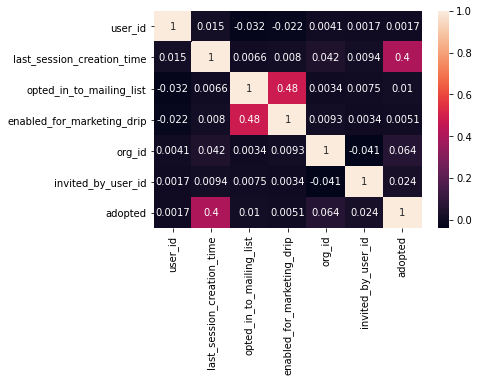

In [177]:
sns.heatmap(user.corr(),annot=True)

In [200]:
u = user.join(pd.get_dummies(user['creation_source']))

In [201]:
u.head(10)

,user_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,adopted,GUEST_INVITE,ORG_INVITE,PERSONAL_PROJECTS,SIGNUP,SIGNUP_GOOGLE_AUTH
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0,0,1,0,0,0,0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,1,0,1,0,0,0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0,0,0,1,0,0,0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0,0,1,0,0,0,0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0,0,1,0,0,0,0
5,6,2013-12-17 03:37:06,Cunha Eduardo,EduardoPereiraCunha@yahoo.com,GUEST_INVITE,1.387424e+09,0,0,197,11241.0,0,1,0,0,0,0
6,7,2012-12-16 13:24:32,Sewell Tyler,TylerSewell@jourrapide.com,SIGNUP,1.356010e+09,0,1,37,0.0,0,0,0,0,1,0
7,8,2013-07-31 05:34:02,Hamilton Danielle,DanielleHamilton@yahoo.com,PERSONAL_PROJECTS,NaN,1,1,74,0.0,0,0,0,1,0,0
8,9,2013-11-05 04:04:24,Amsel Paul,PaulAmsel@hotmail.com,PERSONAL_PROJECTS,NaN,0,0,302,0.0,0,0,0,1,0,0
9,10,2013-01-16 22:08:03,Santos Carla,CarlaFerreiraSantos@gustr.com,ORG_INVITE,1.401833e+09,1,1,318,4143.0,1,0,1,0,0,0


In [209]:
u = u.dropna()
#u['last_session_creation_time'] = u['last_session_creation_time'].apply(lambda x: np.nan_to_num(0) if np.isnan(x) else x)
u['last_session_creation_time'] = u['last_session_creation_time'].apply(lambda x: datetime.utcfromtimestamp(x))


In [210]:
u['creation_time'] = u['creation_time'].apply(lambda x: pd.to_datetime(x))

In [211]:
u['adopted'].value_counts()

0    7351
1    1472
Name: adopted, dtype: int64

In [212]:
u.head()

,user_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,adopted,GUEST_INVITE,ORG_INVITE,PERSONAL_PROJECTS,SIGNUP,SIGNUP_GOOGLE_AUTH
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,2014-04-22 03:53:30,1,0,11,10803.0,0,1,0,0,0,0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,2014-03-31 03:45:04,0,0,1,316.0,1,0,1,0,0,0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,2013-03-19 23:14:52,0,0,94,1525.0,0,0,1,0,0,0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,2013-05-22 08:09:28,0,0,1,5151.0,0,1,0,0,0,0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,2013-01-22 10:14:20,0,0,193,5240.0,0,1,0,0,0,0


In [224]:
u['days_from_creation'] = (u['last_session_creation_time'] - u['creation_time']).dt.days

In [227]:
u.head()

,user_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,adopted,GUEST_INVITE,ORG_INVITE,PERSONAL_PROJECTS,SIGNUP,SIGNUP_GOOGLE_AUTH,days_from_creation
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,2014-04-22 03:53:30,1,0,11,10803.0,0,1,0,0,0,0,0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,2014-03-31 03:45:04,0,0,1,316.0,1,0,1,0,0,0,136
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,2013-03-19 23:14:52,0,0,94,1525.0,0,0,1,0,0,0,0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,2013-05-22 08:09:28,0,0,1,5151.0,0,1,0,0,0,0,1
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,2013-01-22 10:14:20,0,0,193,5240.0,0,1,0,0,0,0,5


In [228]:
u.corr()

,user_id,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,adopted,GUEST_INVITE,ORG_INVITE,PERSONAL_PROJECTS,SIGNUP,SIGNUP_GOOGLE_AUTH,days_from_creation
user_id,1.000000,-0.034920,-0.028916,0.002285,0.003493,-0.000504,-0.001249,-0.004827,0.000265,-0.007198,0.015619,-0.008526
opted_in_to_mailing_list,-0.034920,1.000000,0.488219,-0.002421,0.010839,0.009534,-0.005193,0.011235,-0.005339,0.002632,-0.008198,0.005609
enabled_for_marketing_drip,-0.028916,0.488219,1.000000,0.000538,-0.000173,0.002771,-0.007691,0.009502,-0.018095,0.011159,-0.003042,0.007417
org_id,0.002285,-0.002421,0.000538,1.000000,-0.042723,0.073454,0.001533,-0.018061,0.010924,0.015432,-0.003645,0.064573
invited_by_user_id,0.003493,0.010839,-0.000173,-0.042723,1.000000,0.023275,0.323989,0.535961,-0.256377,-0.435925,-0.359311,0.014226
adopted,-0.000504,0.009534,0.002771,0.073454,0.023275,1.000000,0.053068,-0.017640,0.017875,-0.030818,-0.011757,0.807793
GUEST_INVITE,-0.001249,-0.005193,-0.007691,0.001533,0.323989,0.053068,1.000000,-0.352386,-0.144249,-0.245270,-0.202164,0.050775
ORG_INVITE,-0.004827,0.011235,0.009502,-0.018061,0.535961,-0.017640,-0.352386,1.000000,-0.231589,-0.393777,-0.324570,-0.020841
PERSONAL_PROJECTS,0.000265,-0.005339,-0.018095,0.010924,-0.256377,0.017875,-0.144249,-0.231589,1.000000,-0.161192,-0.132863,0.017802
SIGNUP,-0.007198,0.002632,0.011159,0.015432,-0.435925,-0.030818,-0.245270,-0.393777,-0.161192,1.000000,-0.225910,-0.032374


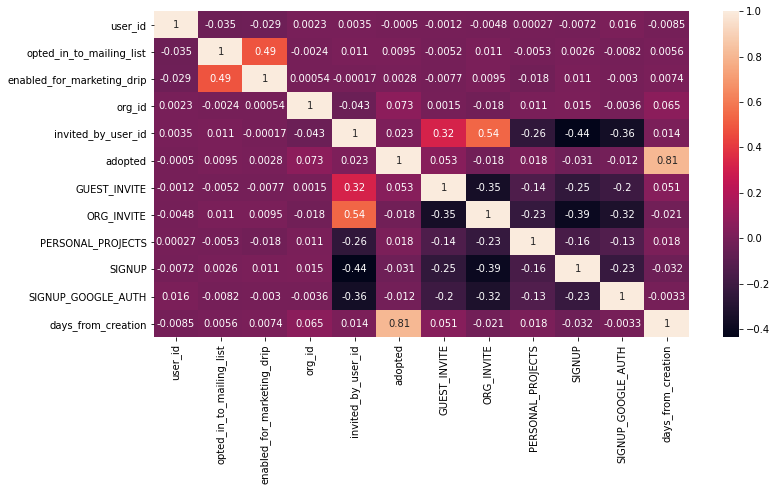

In [229]:
plt.figure(figsize=(12,6))
sns.heatmap(u.corr(),annot=True)

In [250]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

In [236]:
u._get_numeric_data()

,user_id,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,adopted,GUEST_INVITE,ORG_INVITE,PERSONAL_PROJECTS,SIGNUP,SIGNUP_GOOGLE_AUTH,days_from_creation
0,1,1,0,11,10803.0,0,1,0,0,0,0,0
1,2,0,0,1,316.0,1,0,1,0,0,0,136
2,3,0,0,94,1525.0,0,0,1,0,0,0,0
3,4,0,0,1,5151.0,0,1,0,0,0,0,1
4,5,0,0,193,5240.0,0,1,0,0,0,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...
11995,11996,0,0,89,8263.0,0,0,1,0,0,0,0
11996,11997,0,0,200,0.0,0,0,0,0,0,1,5
11997,11998,1,1,83,8074.0,0,1,0,0,0,0,0
11998,11999,0,0,6,0.0,0,0,0,1,0,0,2


In [237]:
X = u._get_numeric_data().drop('adopted',axis=1)
y = u['adopted']

In [252]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.30,random_state=42)
rf = RandomForestClassifier()
svm = SVC()

In [253]:
rf.fit(X_train,y_train)
svm.fit(X_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [254]:
pred = rf.predict(X_test)
pred2= svm.predict(X_test)

In [241]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

In [255]:
print(confusion_matrix(y_test,pred))
print(confusion_matrix(y_test,pred2))

[[2160   26]
 [  69  392]]
[[2186    0]
 [ 254  207]]


In [256]:
print(classification_report(y_test,pred))
print(classification_report(y_test,pred2))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      2186
           1       0.94      0.85      0.89       461

    accuracy                           0.96      2647
   macro avg       0.95      0.92      0.94      2647
weighted avg       0.96      0.96      0.96      2647

              precision    recall  f1-score   support

           0       0.90      1.00      0.95      2186
           1       1.00      0.45      0.62       461

    accuracy                           0.90      2647
   macro avg       0.95      0.72      0.78      2647
weighted avg       0.91      0.90      0.89      2647



In [257]:
print(accuracy_score(y_test,pred))
print(accuracy_score(y_test,pred2))

0.9641103135625236
0.904042312051379


In [245]:
rf.feature_importances_

array([0.05171584, 0.0049163 , 0.00374114, 0.04805728, 0.03093515,
       0.00265743, 0.00282041, 0.00190358, 0.00231309, 0.00209261,
       0.84884718])

In [248]:
u._get_numeric_data()

,user_id,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,adopted,GUEST_INVITE,ORG_INVITE,PERSONAL_PROJECTS,SIGNUP,SIGNUP_GOOGLE_AUTH,days_from_creation
0,1,1,0,11,10803.0,0,1,0,0,0,0,0
1,2,0,0,1,316.0,1,0,1,0,0,0,136
2,3,0,0,94,1525.0,0,0,1,0,0,0,0
3,4,0,0,1,5151.0,0,1,0,0,0,0,1
4,5,0,0,193,5240.0,0,1,0,0,0,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...
11995,11996,0,0,89,8263.0,0,0,1,0,0,0,0
11996,11997,0,0,200,0.0,0,0,0,0,0,1,5
11997,11998,1,1,83,8074.0,0,1,0,0,0,0,0
11998,11999,0,0,6,0.0,0,0,0,1,0,0,2
